In [4]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
# seaborn does not appear to use this inline command
#%seaborn inline

In [5]:
# Read data from the file and store in the variable `data`
data = pd.read_csv('Assign_data.csv', dtype={'Year': int, '113 Cause Name': str, 'Cause Name': 'category', 'State': 'category', 'Deaths': float, 'Age-adjusted Death Rate': float})
data.index.name = 'Index'
data.columns = map(str.capitalize, data.columns)
# Print the first 10 rows of the data
# print('First 10 rows of data:')
data.head(10)


,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7
5,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Colorado,1519.0,39.0
6,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Connecticut,1034.0,29.3
7,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Delaware,267.0,35.3
8,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,District of Columbia,161.0,28.4


In [6]:
# Print the last 5 rows of the data
# print('\nLast 5 rows of data:')
data.tail(5)

,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
15023,2015,Septicemia (A40-A41),Septicemia,Virginia,1187.0,13.0
15024,2015,Septicemia (A40-A41),Septicemia,Washington,501.0,6.3
15025,2015,Septicemia (A40-A41),Septicemia,West Virginia,348.0,13.9
15026,2015,Septicemia (A40-A41),Septicemia,Wisconsin,517.0,7.2
15027,2015,Septicemia (A40-A41),Septicemia,Wyoming,46.0,7.1


In [7]:
# Print summary information on the data table columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     15028 non-null  int64   
 1   113 cause name           15028 non-null  object  
 2   Cause name               15028 non-null  category
 3   State                    15028 non-null  category
 4   Deaths                   15013 non-null  float64 
 5   Age-adjusted death rate  14917 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 500.2+ KB


In [8]:
# Print the number of empty values in each column
print("Number of empty values:")
print(data.isna().sum())

# Print the number of null values in each column
print("\nNumber of null values:")
print(data.isnull().sum())

Number of empty values:
Year                         0
113 cause name               0
Cause name                   0
State                        0
Deaths                      15
Age-adjusted death rate    111
dtype: int64

Number of null values:
Year                         0
113 cause name               0
Cause name                   0
State                        0
Deaths                      15
Age-adjusted death rate    111
dtype: int64


In [9]:
# Print descriptive statistics for the data
print(data.describe())

               Year        Deaths  Age-adjusted death rate
count  15028.000000  1.501300e+04             14917.000000
mean    2007.000000  1.023261e+04                86.526393
std        4.899142  9.003261e+04               190.764950
min     1999.000000  1.000000e+01                 1.300000
25%     2003.000000  2.940000e+02                 8.300000
50%     2007.000000  8.380000e+02                18.900000
75%     2011.000000  2.737000e+03                46.300000
max     2015.000000  2.712630e+06              1087.300000


<AxesSubplot:title={'center':'Total Deaths by State'}, xlabel='State'>

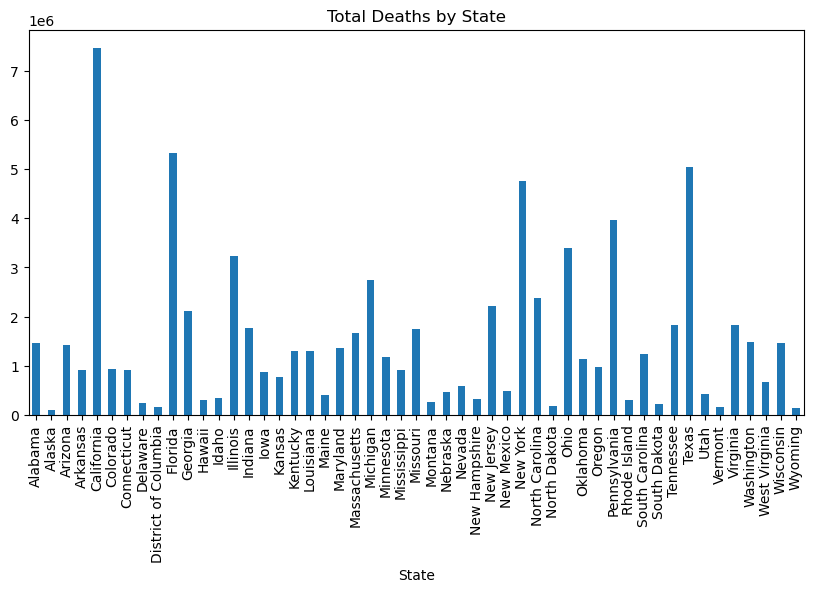

In [10]:
# Are there differences in percentages of the causes by state?

state_death_data = data.groupby('State')['Deaths'].sum()

# drop the 'United States' row
state_death_data = state_death_data.drop('United States')

state_death_data.plot(kind='bar', figsize=(10, 5), title='Total Deaths by State')


In [11]:
us = data.loc[data['State'] == 'United States']
us.head(5)

,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
45,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,97860.0,35.3
98,2000,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,97900.0,34.9
151,2001,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,101537.0,35.7
204,2002,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,106742.0,37.1
256,2003,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,109277.0,37.6


<AxesSubplot:title={'center':'Deaths by Year in the United States'}, xlabel='Year'>

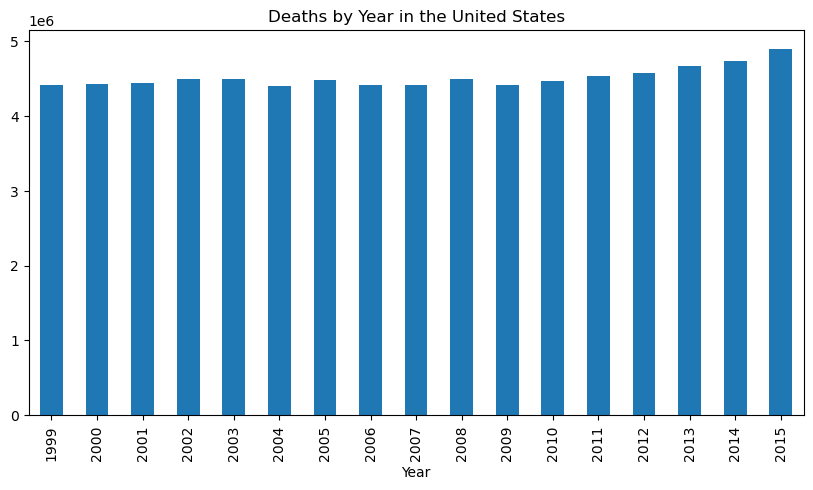

In [12]:
# total deaths by year
us_by_year = us.groupby('Year')['Deaths'].sum()
us_by_year.plot(kind='bar', figsize=(10, 5), title='Deaths by Year in the United States')

<AxesSubplot:title={'center':'Total Deaths by Cause for the US'}, xlabel='Year'>

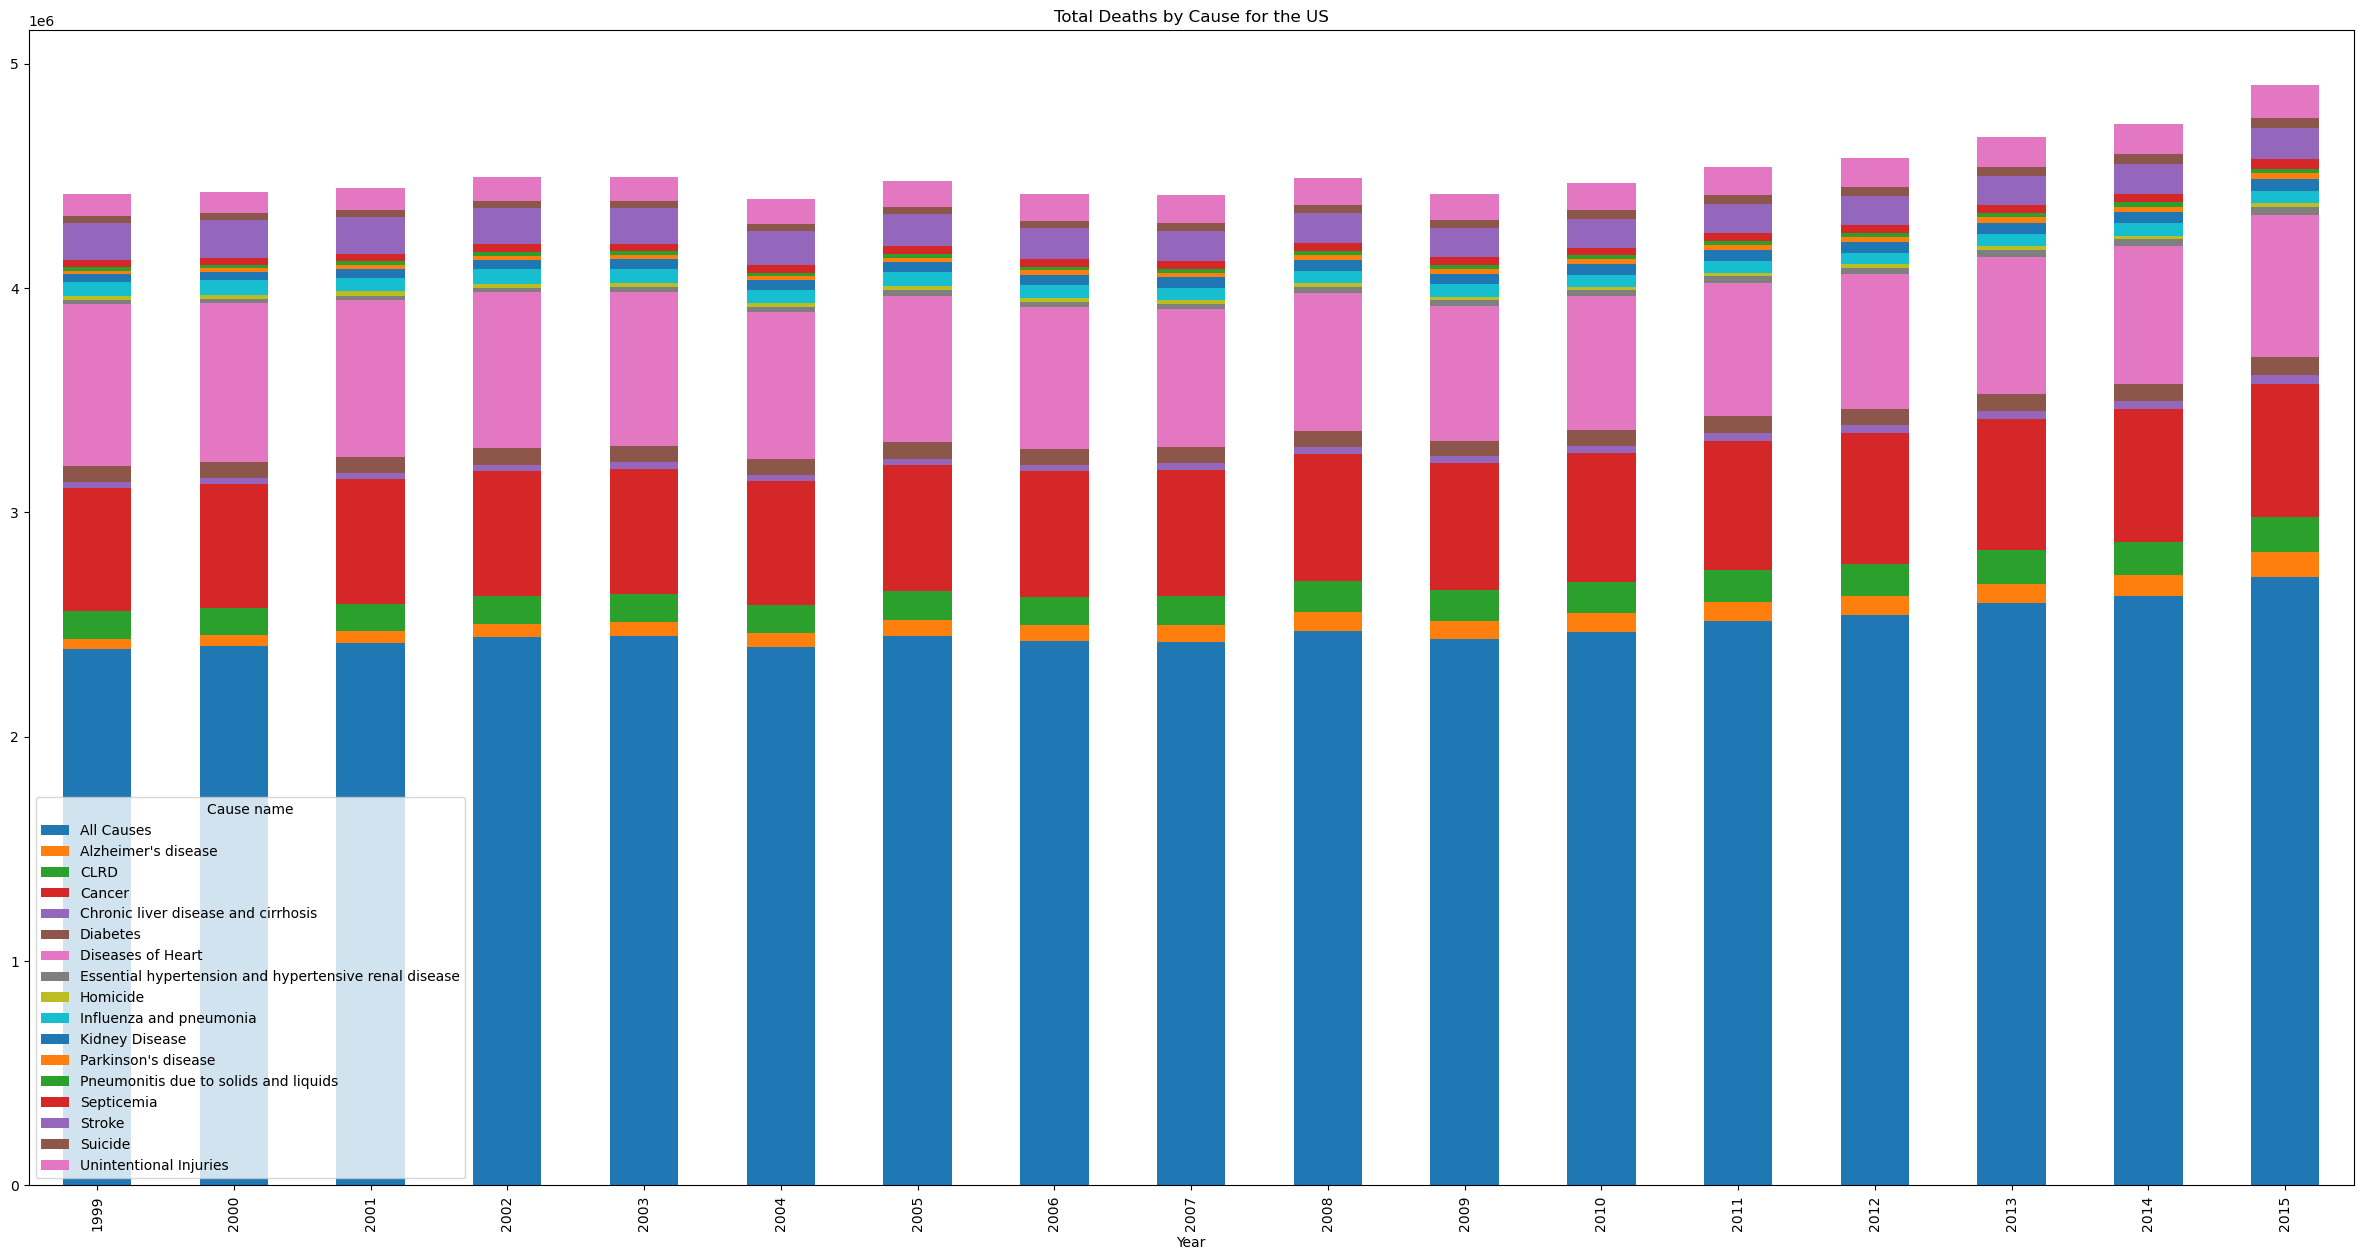

In [13]:
# create a stacked bar chart for the whole us, each bar is a year and each stack is a cause
us.groupby(['Year', 'Cause name'])['Deaths'].sum().unstack().plot(kind='bar', stacked=True, figsize=(30, 15), title='Total Deaths by Cause for the US')

<AxesSubplot:title={'center':'Total Deaths by Cause'}, xlabel='Cause name'>

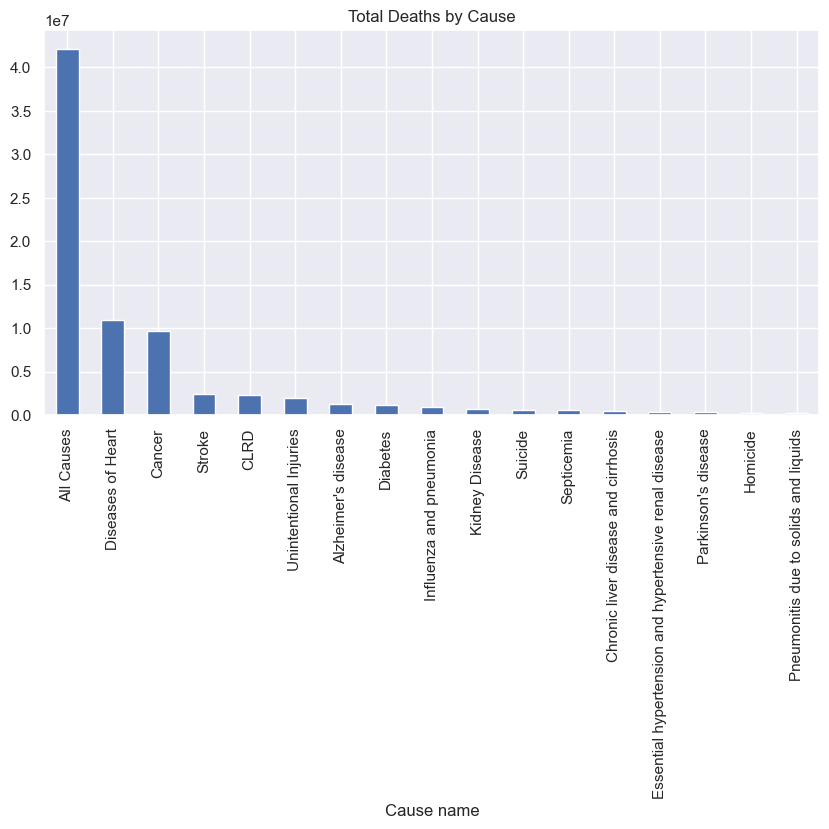

In [22]:
# total deaths by cause across all years
us.groupby('Cause name')['Deaths'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Total Deaths by Cause')

# us.Deaths.value_counts(normalize=False).plot.bar() 


<AxesSubplot:title={'center':'Deaths by Cause in the United States'}, xlabel='Cause name'>

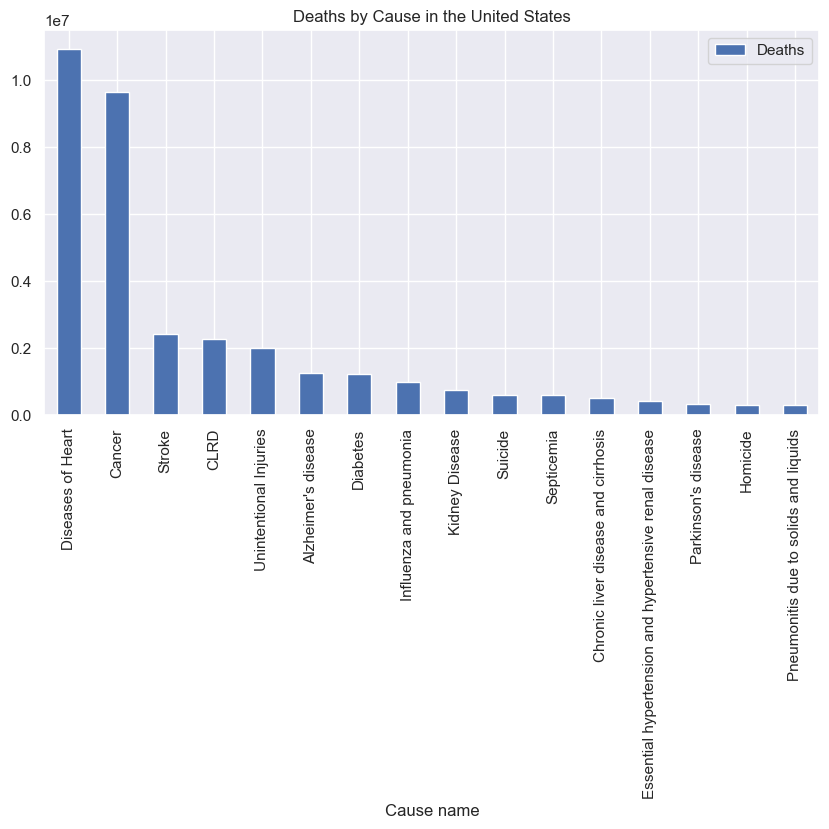

In [76]:
# Because the above chart includes "All Causes", it could be more useful and clear
# Removing "All Causes" will show the relative scale better
us_by_cause = us.groupby('Cause name')['Deaths'].sum().sort_values(ascending=False).to_frame()
us_without_all = us_by_cause.drop('All Causes')
us_without_all.plot(kind='bar', figsize=(10, 5), title='Deaths by Cause in the United States')

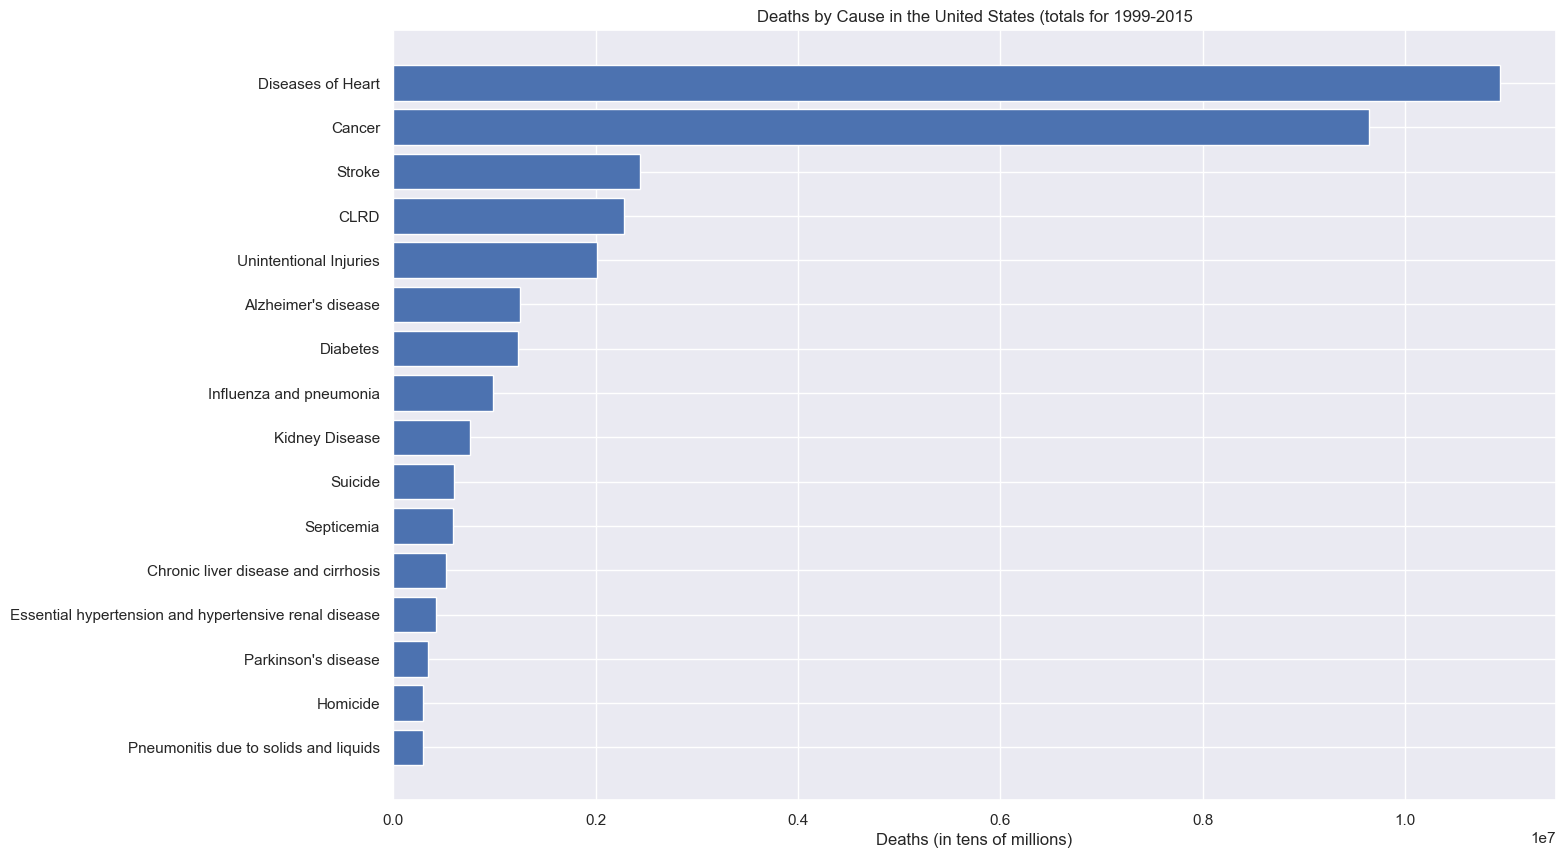

In [77]:
# rotate the above chart to make the labels easiers to read
# first resort so the largest values are at the top
us_without_all = us_without_all.sort_values(by='Deaths', ascending=True)
# barh = horizontal bar chart
fig, ax = plt.subplots()
ax.barh(us_without_all.index, us_without_all['Deaths'])
ax.set_title('Deaths by Cause in the United States (totals for 1999-2015')
ax.set_xlabel("Deaths (in tens of millions)")
plt.show()

In [74]:
data['Cause name'].cat.categories

Index(['All Causes', 'Alzheimer's disease', 'CLRD', 'Cancer',
       'Chronic liver disease and cirrhosis', 'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease', 'Homicide',
       'Influenza and pneumonia', 'Kidney Disease', 'Parkinson's disease',
       'Pneumonitis due to solids and liquids', 'Septicemia', 'Stroke',
       'Suicide', 'Unintentional Injuries'],
      dtype='object')

In [104]:
# remove US totals
states = data[data['State'] != 'United States']
# states = data.query("State != 'United States'")
# states = data[data['State'].isin(['United States']) == False]
states['Year'].value_counts()


1999    867
2011    867
2012    867
2009    867
2014    867
2008    867
2007    867
2013    867
2004    867
2003    867
2010    867
2002    867
2006    867
2001    867
2005    867
2000    867
2015    867
Name: Year, dtype: int64

In [105]:
# remove "All Causes"
states = states[states['Cause name'] != 'All Causes']
states['Year'].value_counts()

1999    816
2008    816
2014    816
2013    816
2012    816
2011    816
2010    816
2009    816
2007    816
2000    816
2006    816
2005    816
2004    816
2003    816
2002    816
2001    816
2015    816
Name: Year, dtype: int64

In [116]:
states_by_year = states.groupby(['State', 'Year', 'Cause name'])['Deaths'].sum().unstack()
del states_by_year['All Causes']
states_by_year

Cause name    Alzheimer's disease    CLRD  Cancer  \
State   Year                                        
Alabama 1999                772.0  2179.0  9506.0   
        2000                895.0  2057.0  9807.0   
        2001               1103.0  2204.0  9801.0   
        2002               1189.0  2328.0  9698.0   
        2003               1268.0  2434.0  9812.0   
...                           ...     ...     ...   
Wyoming 2011                153.0   327.0   936.0   
        2012                123.0   334.0   955.0   
        2013                126.0   387.0   946.0   
        2014                162.0   343.0   922.0   
        2015                151.0   368.0   931.0   

Cause name    Chronic liver disease and cirrhosis  Diabetes  \
State   Year                                                  
Alabama 1999                                412.0    1341.0   
        2000                                407.0    1321.0   
        2001                                445.0    1344.0   
        2002                                425.0    1486.0   
        2003                                440.0    1414.0   
...                                           ...       ...   
Wyoming 2011                                 86.0     108.0   
        2012                                103.0      97.0   
        2013                                 92.0      89.0   
        2014                                 89.0     110.0   
        2015                                118.0     136.0   

Cause name    Diseases of Heart  \
State   Year                      
Alabama 1999            13419.0   
        2000            13406.0   
        2001            13207.0   
        2002            13197.0   
        2003            13150.0   
...                         ...   
Wyoming 2011              926.0   
        2012             1005.0   
        2013              939.0   
        2014             1035.0   
        2015             1030.0   

Cause name    Essential hypertension and hypertensive renal disease  Homicide  \
State   Year                                                                    
Alabama 1999                                              313.0         438.0   
        2000                                              291.0         444.0   
        2001                                              369.0         425.0   
        2002                                              343.0         416.0   
        2003                                              402.0         434.0   
...                                                         ...           ...   
Wyoming 2011                                               25.0          23.0   
        2012                                               29.0          20.0   
        2013                                               31.0          17.0   
        2014                                               26.0          24.0   
        2015                                               41.0          17.0   

Cause name    Influenza and pneumonia  Kidney Disease  Parkinson's disease  \
State   Year                                                                 
Alabama 1999                   1228.0           979.0                207.0   
        2000                   1138.0           939.0                214.0   
        2001                   1105.0           974.0                239.0   
        2002                   1218.0          1032.0                232.0   
        2003                   1157.0          1062.0                265.0   
...                               ...             ...                  ...   
Wyoming 2011                    116.0            85.0                 33.0   
        2012                     91.0            72.0                 39.0   
        2013                    112.0            56.0                 35.0   
        2014                    113.0            78.0                 47.0   
        2015                     99.0       

In [117]:
# Add yearly totals column to the dataframe
states_by_year['Total'] = states_by_year.sum(axis=1)
states_by_year

Cause name    Alzheimer's disease    CLRD  Cancer  \
State   Year                                        
Alabama 1999                772.0  2179.0  9506.0   
        2000                895.0  2057.0  9807.0   
        2001               1103.0  2204.0  9801.0   
        2002               1189.0  2328.0  9698.0   
        2003               1268.0  2434.0  9812.0   
...                           ...     ...     ...   
Wyoming 2011                153.0   327.0   936.0   
        2012                123.0   334.0   955.0   
        2013                126.0   387.0   946.0   
        2014                162.0   343.0   922.0   
        2015                151.0   368.0   931.0   

Cause name    Chronic liver disease and cirrhosis  Diabetes  \
State   Year                                                  
Alabama 1999                                412.0    1341.0   
        2000                                407.0    1321.0   
        2001                                445.0    1344.0   
        2002                                425.0    1486.0   
        2003                                440.0    1414.0   
...                                           ...       ...   
Wyoming 2011                                 86.0     108.0   
        2012                                103.0      97.0   
        2013                                 92.0      89.0   
        2014                                 89.0     110.0   
        2015                                118.0     136.0   

Cause name    Diseases of Heart  \
State   Year                      
Alabama 1999            13419.0   
        2000            13406.0   
        2001            13207.0   
        2002            13197.0   
        2003            13150.0   
...                         ...   
Wyoming 2011              926.0   
        2012             1005.0   
        2013              939.0   
        2014             1035.0   
        2015             1030.0   

Cause name    Essential hypertension and hypertensive renal disease  Homicide  \
State   Year                                                                    
Alabama 1999                                              313.0         438.0   
        2000                                              291.0         444.0   
        2001                                              369.0         425.0   
        2002                                              343.0         416.0   
        2003                                              402.0         434.0   
...                                                         ...           ...   
Wyoming 2011                                               25.0          23.0   
        2012                                               29.0          20.0   
        2013                                               31.0          17.0   
        2014                                               26.0          24.0   
        2015                                               41.0          17.0   

Cause name    Influenza and pneumonia  Kidney Disease  Parkinson's disease  \
State   Year                                                                 
Alabama 1999                   1228.0           979.0                207.0   
        2000                   1138.0           939.0                214.0   
        2001                   1105.0           974.0                239.0   
        2002                   1218.0          1032.0                232.0   
        2003                   1157.0          1062.0                265.0   
...                               ...             ...                  ...   
Wyoming 2011                    116.0            85.0                 33.0   
        2012                     91.0            72.0                 39.0   
        2013                    112.0            56.0                 35.0   
        2014                    113.0            78.0                 47.0   
        2015                     99.0       

In [120]:
# get the data just for California, for example
states_by_year.loc['California']

Cause name,Alzheimer's disease,CLRD,Cancer,Chronic liver disease and cirrhosis,Diabetes,Diseases of Heart,Essential hypertension and hypertensive renal disease,Homicide,Influenza and pneumonia,Kidney Disease,Parkinson's disease,Pneumonitis due to solids and liquids,Septicemia,Stroke,Suicide,Unintentional Injuries,Total
Year,,,,,,,,,,,,,,,,,
1999,4532.0,13165.0,53067.0,3572.0,6401.0,71930.0,2029.0,2066.0,4560.0,2261.0,1577.0,355.0,756.0,17962.0,3077.0,9198.0,196508.0
2000,4419.0,12756.0,53158.0,3666.0,6190.0,68426.0,2016.0,2064.0,8324.0,1785.0,1484.0,910.0,807.0,18185.0,2969.0,8577.0,195736.0
2001,4935.0,12965.0,53924.0,3692.0,6395.0,68234.0,2339.0,2223.0,8129.0,1994.0,1512.0,997.0,854.0,18088.0,2831.0,8132.0,197244.0
2002,5421.0,12684.0,54143.0,3747.0,6807.0,68797.0,2337.0,2485.0,8128.0,2164.0,1582.0,987.0,941.0,17626.0,3228.0,10107.0,201184.0
2003,6585.0,13448.0,54319.0,3833.0,7093.0,68864.0,2586.0,2487.0,8185.0,2334.0,1803.0,934.0,978.0,17692.0,3397.0,10471.0,205009.0
2004,6964.0,12522.0,53700.0,3703.0,7117.0,64999.0,2859.0,2490.0,7323.0,2373.0,1832.0,951.0,931.0,16882.0,3368.0,10633.0,198647.0
2005,7706.0,13188.0,54732.0,3822.0,7697.0,64916.0,3034.0,2540.0,7553.0,2482.0,1905.0,826.0,1033.0,15585.0,3206.0,11129.0,201354.0
2006,8146.0,12829.0,54140.0,3840.0,7376.0,64871.0,3162.0,2616.0,7338.0,2676.0,1948.0,888.0,1058.0,15039.0,3334.0,11375.0,200636.0
2007,8497.0,12532.0,55011.0,4065.0,7413.0,61690.0,3193.0,2376.0,6546.0,2835.0,1992.0,903.0,1073.0,14557.0,3602.0,11614.0,197899.0


<AxesSubplot:title={'center':'Total Deaths by Cause for California'}, xlabel='Year'>

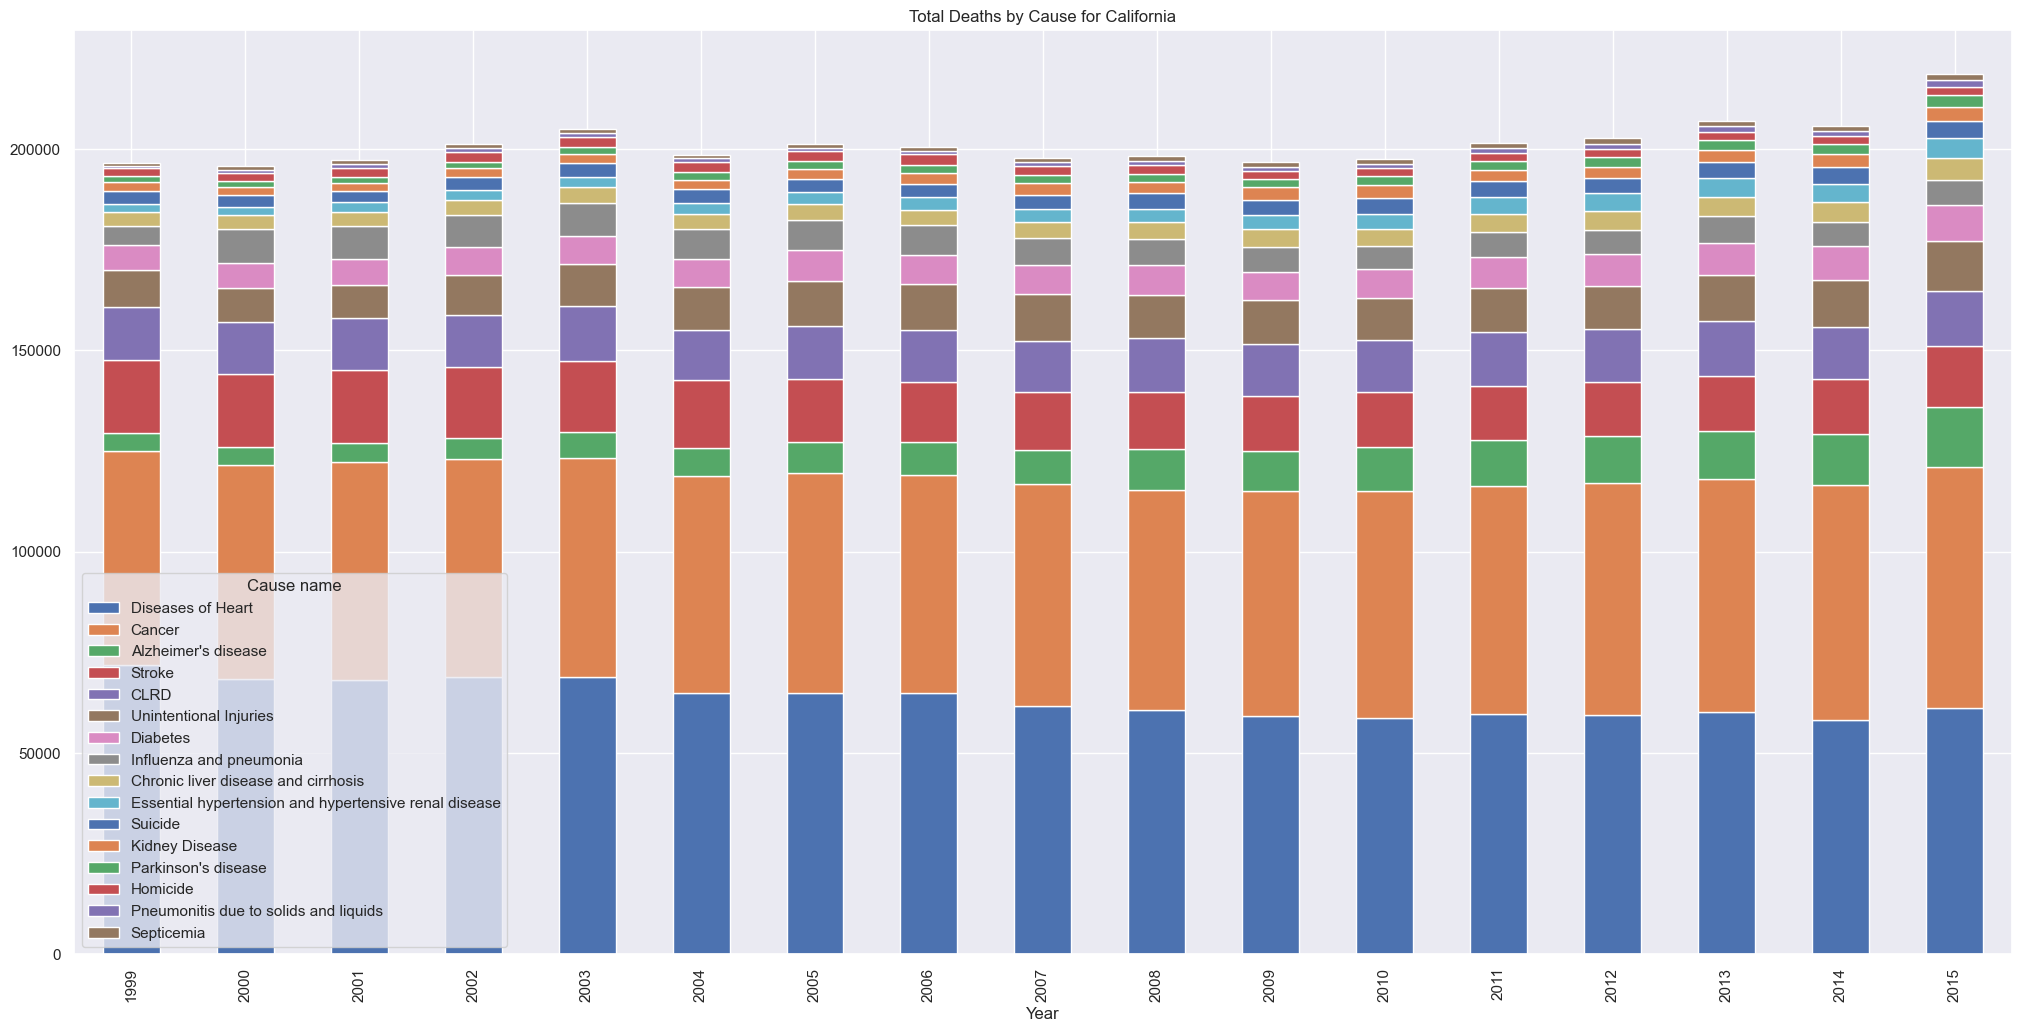

In [133]:
# create a stacked bar chart for California, each bar is a year and each stack is a cause
ca = states_by_year.loc['California']
ca = ca.drop('Total', axis=1)
# sort the columns by the 2015 values so the largest values are at the bottom
ca = ca.sort_values(by=2015, axis=1, ascending=False)  # type: ignore
ca.plot(kind='bar', stacked=True, figsize=(25, 12), title='Total Deaths by Cause for California')

<AxesSubplot:title={'center':'Total Deaths by Cause for California in 2015'}, ylabel='2015'>

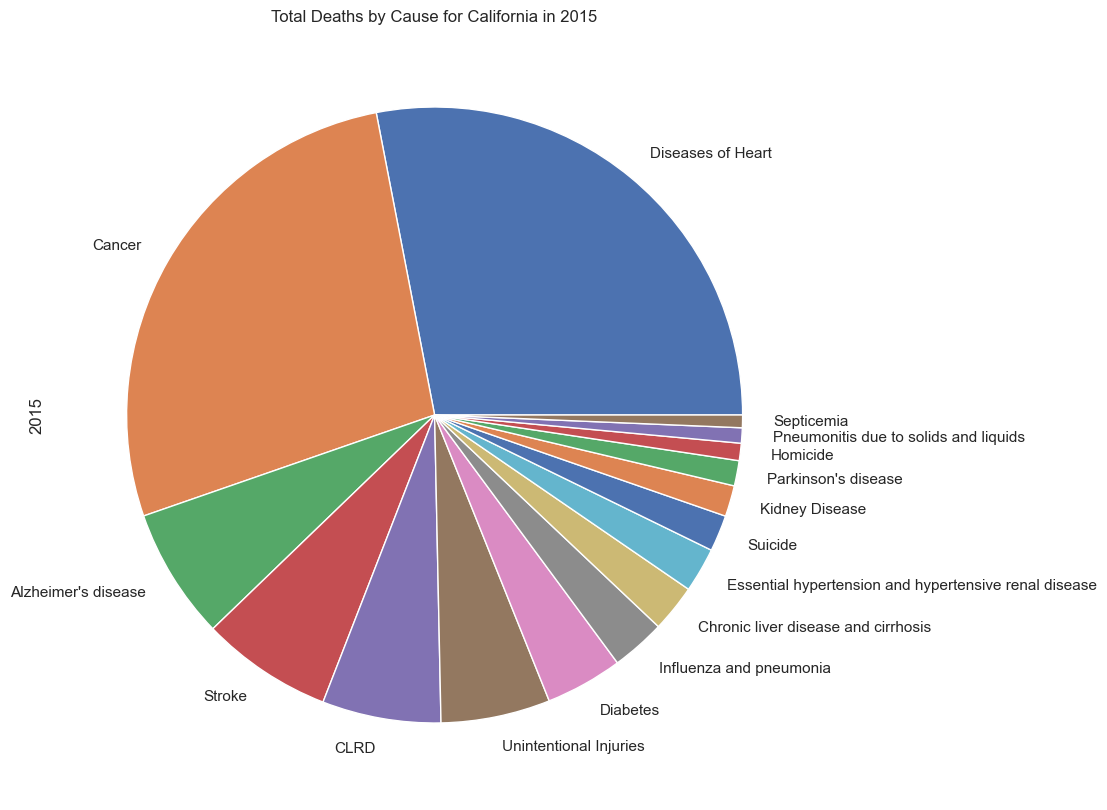

In [135]:
# create a pie chart of causes of death for California in 2015
ca.loc[2015].plot(kind='pie', figsize=(10, 10), title='Total Deaths by Cause for California in 2015')

In [122]:
# create a new dataframe for percentages of deaths by cause, still separated by state and year
states_by_year_pct = states_by_year.div(states_by_year['Total'], axis=0)
states_by_year_pct

Cause name    Alzheimer's disease      CLRD    Cancer  \
State   Year                                            
Alabama 1999             0.020419  0.057635  0.251435   
        2000             0.023651  0.054358  0.259156   
        2001             0.029028  0.058003  0.257935   
        2002             0.030807  0.060319  0.251276   
        2003             0.032740  0.062847  0.253350   
...                           ...       ...       ...   
Wyoming 2011             0.043086  0.092087  0.263588   
        2012             0.033847  0.091910  0.262796   
        2013             0.035068  0.107709  0.263290   
        2014             0.043595  0.092304  0.248116   
        2015             0.039313  0.095808  0.242385   

Cause name    Chronic liver disease and cirrhosis  Diabetes  \
State   Year                                                  
Alabama 1999                             0.010897  0.035470   
        2000                             0.010755  0.034908   
        2001                             0.011711  0.035370   
        2002                             0.011012  0.038502   
        2003                             0.011361  0.036510   
...                                           ...       ...   
Wyoming 2011                             0.024219  0.030414   
        2012                             0.028343  0.026692   
        2013                             0.025605  0.024770   
        2014                             0.023950  0.029602   
        2015                             0.030721  0.035407   

Cause name    Diseases of Heart  \
State   Year                      
Alabama 1999           0.354934   
        2000           0.354262   
        2001           0.347571   
        2002           0.341935   
        2003           0.339539   
...                         ...   
Wyoming 2011           0.260772   
        2012           0.276555   
        2013           0.261341   
        2014           0.278525   
        2015           0.268159   

Cause name    Essential hypertension and hypertensive renal disease  Homicide  \
State   Year                                                                    
Alabama 1999                                           0.008279      0.011585   
        2000                                           0.007690      0.011733   
        2001                                           0.009711      0.011185   
        2002                                           0.008887      0.010779   
        2003                                           0.010380      0.011206   
...                                                         ...           ...   
Wyoming 2011                                           0.007040      0.006477   
        2012                                           0.007980      0.005504   
        2013                                           0.008628      0.004731   
        2014                                           0.006997      0.006459   
        2015                                           0.010674      0.004426   

Cause name    Influenza and pneumonia  Kidney Disease  Parkinson's disease  \
State   Year                                                                 
Alabama 1999                 0.032481        0.025895             0.005475   
        2000                 0.030072        0.024814             0.005655   
        2001                 0.029080        0.025633             0.006290   
        2002                 0.031558        0.026739             0.006011   
        2003                 0.029874        0.027421             0.006842   
...                               ...             ...                  ...   
Wyoming 2011                 0.032667        0.023937             0.009293   
        2012                 0.025041        0.019813             0.010732   
        2013                 0.031172        0.015586             0.009741   
        2014                 0.030409        0.020990             0.01

<AxesSubplot:title={'center':'Percentages of Deaths by Cause for California'}, xlabel='Year'>

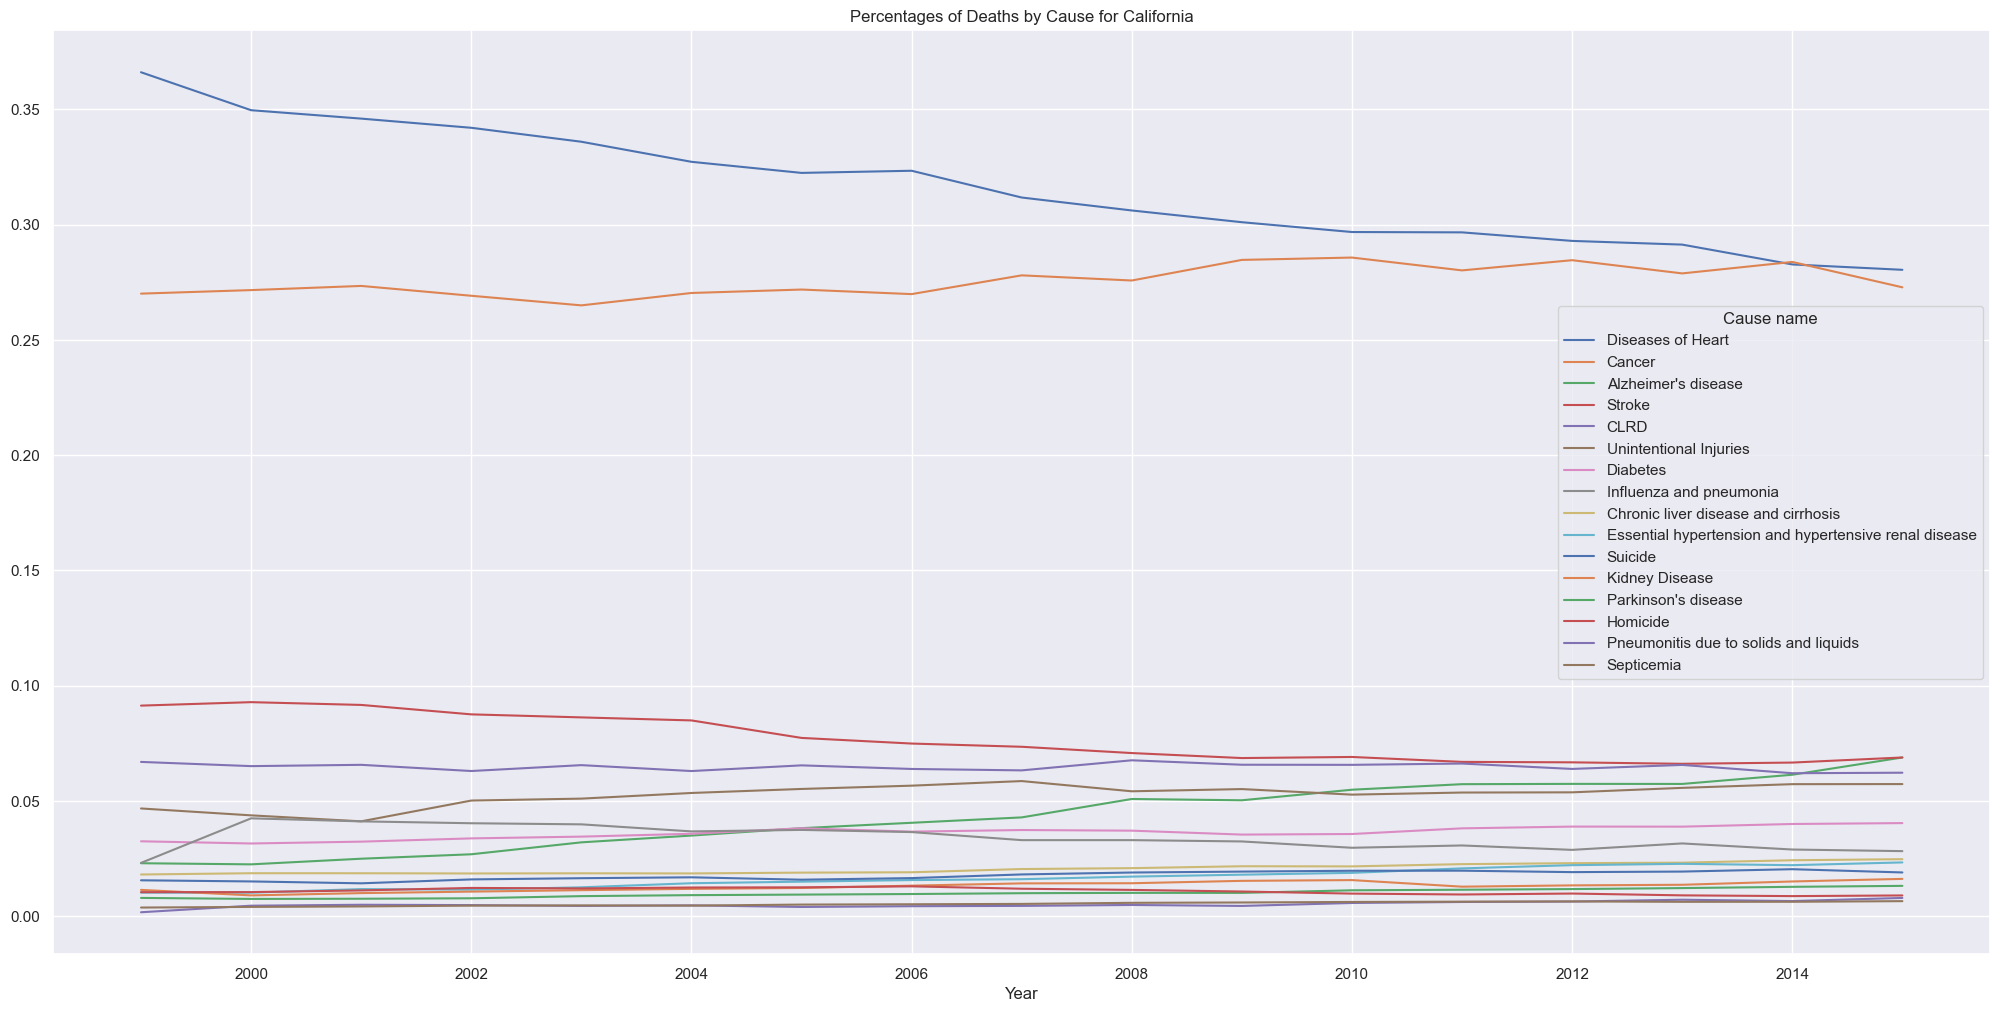

In [140]:
# create a line chart of the percentages of deaths by cause for California
ca_pct = states_by_year_pct.loc['California']
ca_pct = ca_pct.drop('Total', axis=1)
ca_pct = ca_pct.sort_values(by=2015, axis=1, ascending=False)  # type: ignore
ca_pct.plot(kind='line', figsize=(25, 12), title='Percentages of Deaths by Cause for California')


In [64]:
# Do the percentages of the causes change over time?
df = us[us['Cause name'].isin(['All Causes']) == False]

# Matt:
# create a table of the the top causes of death by year
# create a table of the top 5 percentage increases/decreases in causes of death by year for the US
# graph first derivative of deaths by cause by year for the US

# Lucas:
# create a table of the top 5 causes of death by year for each state
# create a table of the top 5 percentage increases/decreases in causes of death by year for each state
# graph first derivative of deaths by cause by year for each state

# box plot for each cause by year with percentages of the deaths in that state

# show table with 0 values for the Age-adjusted Death Rate for each cause 
# to show that it is because of the low number of deaths for that cause/state/year


In [65]:
# create a table of causes of death by year for each state
#TODO: improve readability when using year
data_without = data.loc[data['Cause name'] != 'All Causes'] # Remove all causes
data_without = data_without.loc[data['State'] != 'United States'] #Remove United States
#us_by_state_cause = data_without.groupby(['State','Cause name']).agg({'Deaths': 'sum'}) #Group and sum
us_by_state_cause = data_without.groupby(['State','Year','Cause name']).agg({'Deaths': 'sum'}) #Group and sum
us_by_state_cause = us_by_state_cause.groupby(level=0).apply(lambda x:100 * x/ float(x.sum())) #Percentage
#us_by_state_cause = us_by_state_cause.sort_values(['State','Deaths'], ascending=False)
us_by_state_cause = us_by_state_cause.sort_values(['Year','State','Deaths'], ascending=False)
print(us_by_state_cause)

                                                                   Deaths
State   Year Cause name                                                  
Wyoming 2015 Diseases of Heart                                   1.731820
             Cancer                                              1.565364
             Unintentional Injuries                              0.672551
             CLRD                                                0.618747
             Stroke                                              0.332913
...                                                                   ...
Alabama 1999 Chronic liver disease and cirrhosis                 0.062418
             Essential hypertension and hypertensive renal d...  0.047420
             Pneumonitis due to solids and liquids               0.046359
             Parkinson's disease                                 0.031361
             All Causes                                          0.000000

[15028 rows x 1 columns]


Text(0.5, 1.0, 'Deaths by Cause by Year in the United States')

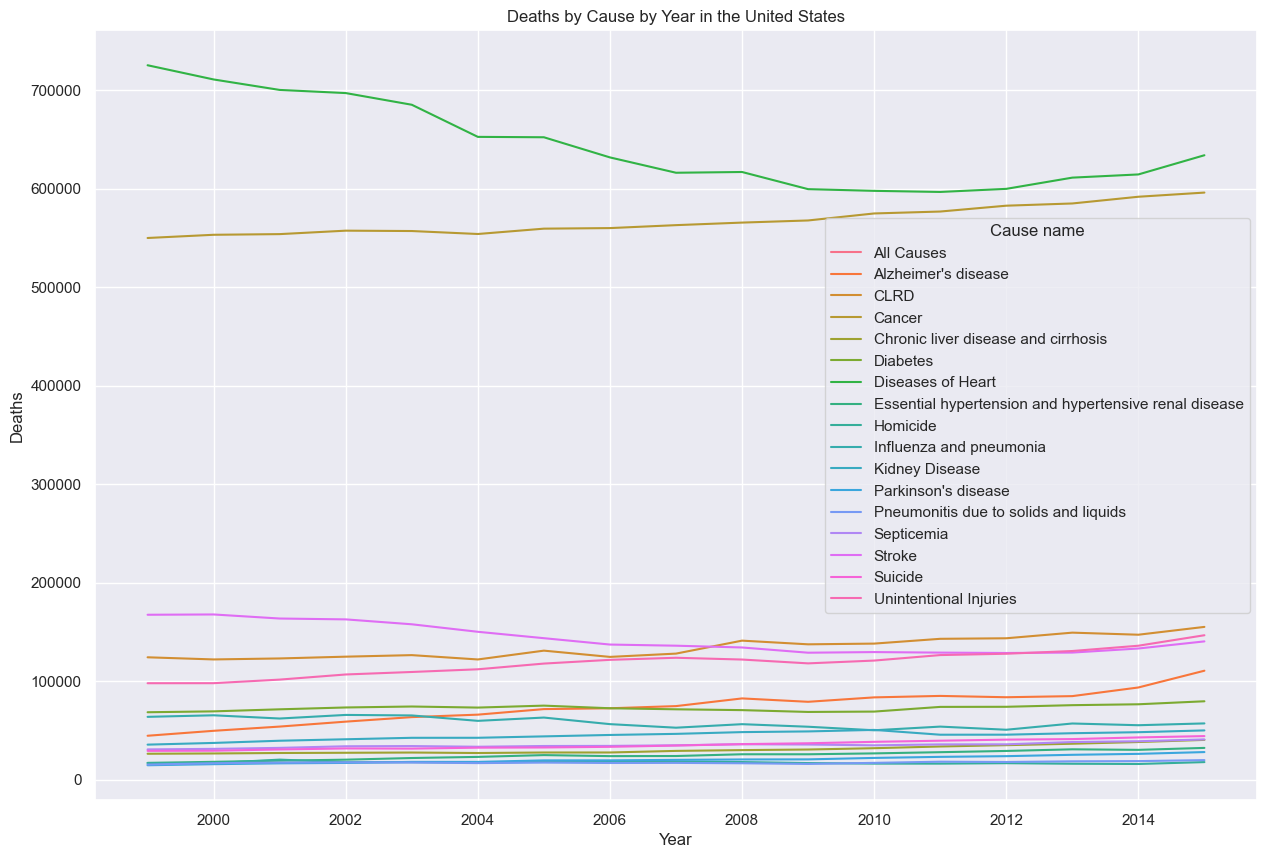

In [66]:


# make this bigger 
sns.set(rc={"figure.figsize":(15, 10)}) 
sns.lineplot(data=df, x='Year', y='Deaths', hue='Cause name').set_title('Deaths by Cause by Year in the United States')




In [67]:
# Do the percentages of the causes change over time by state?


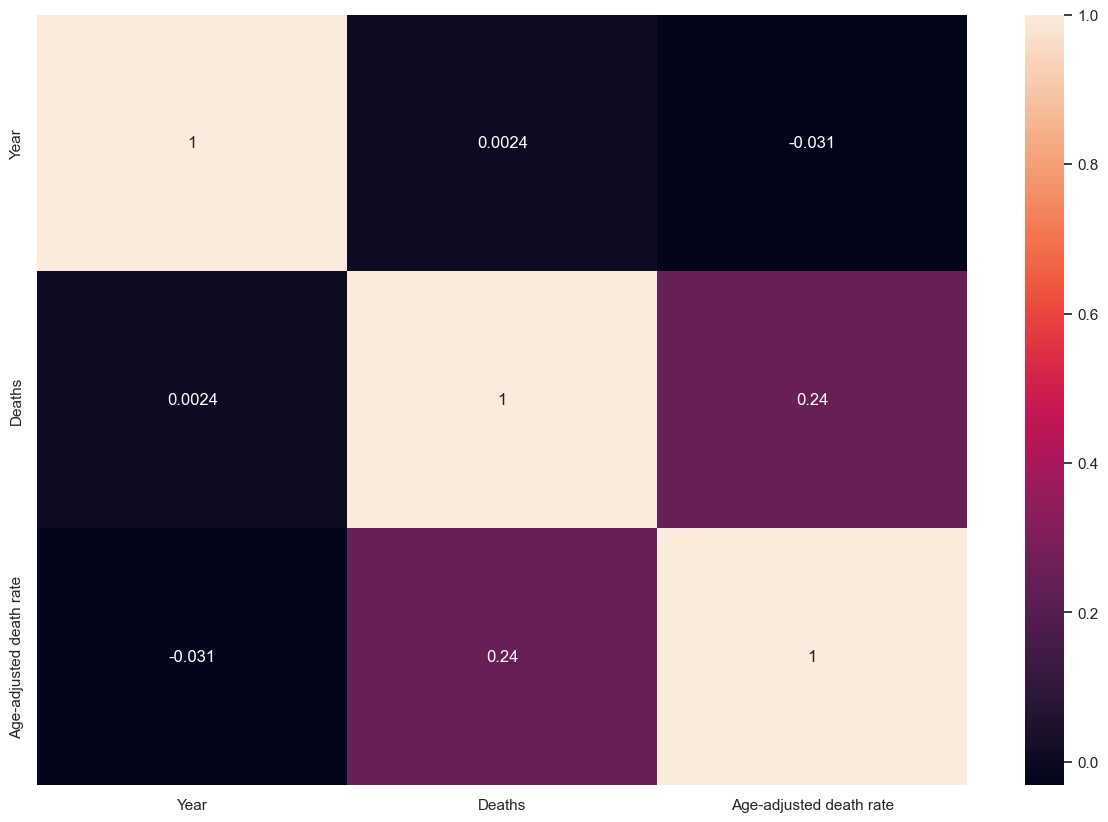

<Figure size 500x500 with 0 Axes>

In [68]:
#Corralation matrix
sns.heatmap(data=data.corr(),annot=True) #heatmap based on the corralation of variables
plt.figure(figsize=(5,5)) #Create a figure with the size of 5x5 inches
plt.show()